In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression

In [2]:
ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2022_MCD3735A/Módulo 8 - Extracción de características en series de tiempo/'
data=pd.read_csv(ruta+'h2o.csv')
data.head()

,x,fecha
0,0.429795,1991-07-01
1,0.400906,1991-08-01
2,0.432159,1991-09-01
3,0.492543,1991-10-01
4,0.502369,1991-11-01


In [5]:
data.tail()

,x,fecha
199,0.761822,2008-02-01
200,0.649435,2008-03-01
201,0.827887,2008-04-01
202,0.816255,2008-05-01
203,0.762137,2008-06-01


In [6]:
data['fecha'].dtype

dtype('O')

In [7]:
data['fecha']=pd.to_datetime(data['fecha'])
data['año']=data.fecha.dt.year
data['mes']=data.fecha.dt.month
data.head()

,x,fecha,año,mes
0,0.429795,1991-07-01,1991,7
1,0.400906,1991-08-01,1991,8
2,0.432159,1991-09-01,1991,9
3,0.492543,1991-10-01,1991,10
4,0.502369,1991-11-01,1991,11


In [8]:
datetime.datetime.timestamp(data['fecha'][0])

678326400.0

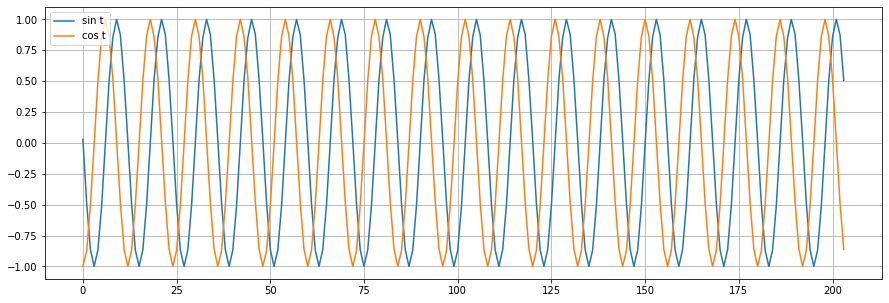

In [10]:
data['seg']=data['fecha'].map(datetime.datetime.timestamp)
w=data['seg']/(60*60*24*365.2425)*2*np.pi
data['sin t']=np.sin(w)
data['cos t']=np.cos(w)
data[['sin t','cos t']].plot(grid=True,figsize=(15,5))

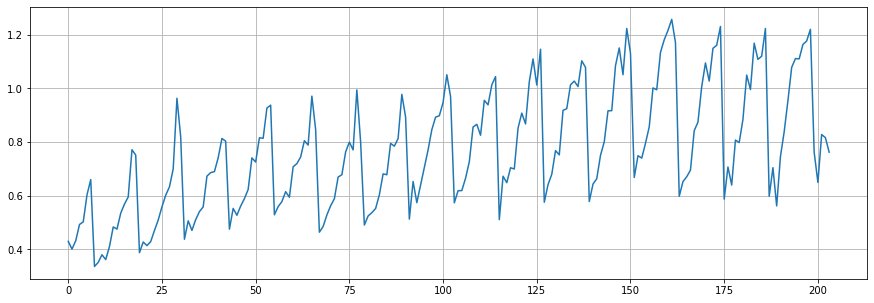

In [12]:
data['x'].plot(grid=True,figsize=(15,5))

# Extracción de características por intervalos

In [13]:
data.head(2)

,x,fecha,año,mes,seg,sin t,cos t
0,0.429795,1991-07-01,1991,7,678326400.0,0.029477,-0.999565
1,0.400906,1991-08-01,1991,8,681004800.0,-0.482761,-0.875752


In [24]:
me=[]
std=[]
tendencia=[]
w=6
x=data['x']
lin=LinearRegression()
for i in range(len(x)-w):
  me.append(x[i:i+w].mean())
  std.append(x[i:i+w].std())
  t=data['seg'][i:i+w].values/(60*60*24*365.2425)
  lin.fit(t.reshape(-1,1),x[i:i+w])
  tendencia.append(lin.coef_[0])

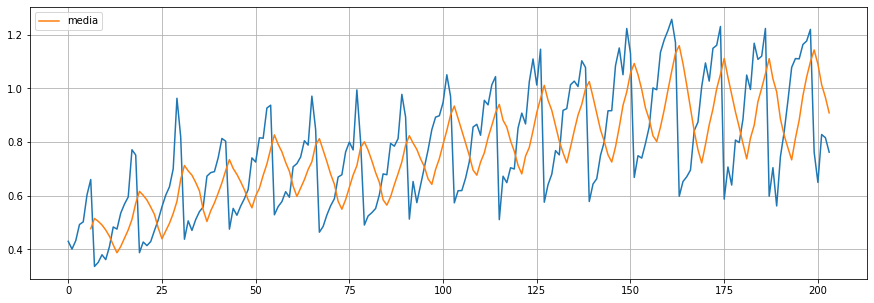

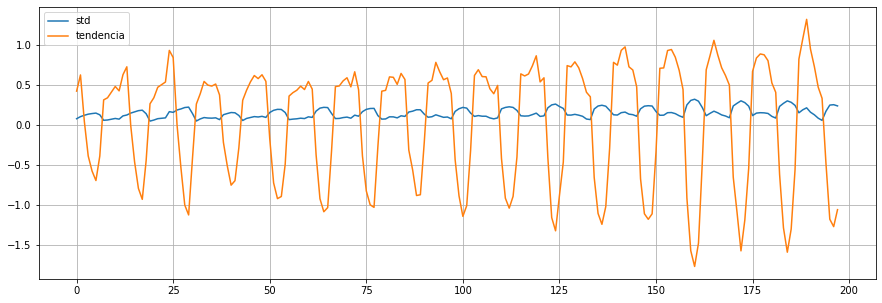

In [25]:
plt.figure(figsize=(15,5))
plt.plot(x)
plt.plot(data.index[w:],me,label='media')
plt.legend()
plt.grid()

plt.figure(figsize=(15,5))
plt.plot(std,label='std')
plt.plot(tendencia,label='tendencia')
plt.legend()
plt.grid()

# Regresión

In [26]:
from scipy.stats import zscore

In [28]:
X=zscore(np.array([me,std,tendencia,data['sin t'].values[w:],data['cos t'].values[w:]]).T)
Y=zscore(data['x'][w:])
X.shape,Y.shape

((198, 5), (198,))

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
nnet=keras.Sequential([
                       keras.Input(shape=(5,)),
                       layers.Dense(5,activation=tf.nn.tanh),
                       layers.Dense(1,activation=tf.nn.tanh)
])
nnet.compile(loss='mean_squared_error',optimizer='sgd')

In [31]:
nnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nnet.fit(X,Y/2,epochs=500)

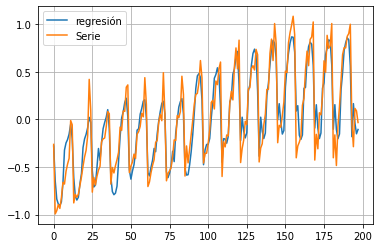

In [40]:
y=nnet(X)
plt.plot(y,label='regresión')
plt.plot(Y/2,label='Serie')
plt.legend()
plt.grid()